In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from modules.forecasting.data.preprocess_coin import CoinPreprocessor
from modules.forecasting.data.preprocess_panel import PanelPreprocessor

coin_pre = CoinPreprocessor()
panel_pre = PanelPreprocessor()

In [2]:
num_coins_query = "SELECT COUNT(DISTINCT symbol) AS num_coins FROM ohlcv WHERE exchange = 'binance';"
num_coins_df = pd.read_sql(num_coins_query, coin_pre.engine)
num_coins = num_coins_df.iloc[0, 0]
print(f"Total unique coins in DB: {num_coins}")

Total unique coins in DB: 30


In [3]:
symbols_query = "SELECT DISTINCT symbol FROM ohlcv WHERE exchange = 'binance';"
symbols_df = pd.read_sql(symbols_query, coin_pre.engine)
all_coins = symbols_df['symbol'].tolist()
print("Sample coins:", all_coins) 

Sample coins: ['0G', 'AAVE', 'ADA', 'APT', 'AVAX', 'BCH', 'BNB', 'BTC', 'DOT', 'ENA', 'ETC', 'ETH', 'HBAR', 'LINK', 'LTC', 'NEAR', 'ONDO', 'PEPE', 'SHIB', 'SOL', 'SUI', 'TAO', 'TON', 'TRX', 'UNI', 'USDE', 'WBETH', 'WLFI', 'XLM', 'XRP']


In [4]:
df_btc = coin_pre.load_data("BTC/USDT", interval="1h")

df_btc.head()
df_btc.info()
df_btc.describe()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 71044 entries, 2017-08-17 04:00:00+00:00 to 2025-09-29 15:00:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    71044 non-null  float64
 1   high    71044 non-null  float64
 2   low     71044 non-null  float64
 3   close   71044 non-null  float64
 4   volume  71044 non-null  float64
dtypes: float64(5)
memory usage: 3.3 MB


,open,high,low,close,volume
count,71044.000000,71044.000000,71044.000000,71044.000000,71044.000000
mean,33923.635531,34065.818706,33775.014061,33925.173401,2662.733380
std,30391.642314,30485.996706,30295.601302,30392.926265,3967.090312
min,2870.900000,2950.000000,2817.000000,2919.000000,0.000000
25%,9031.857500,9078.060000,8959.500000,9031.750000,794.056701
50%,23939.975000,24052.365000,23813.260000,23940.275000,1451.134058
75%,49811.397500,50100.977500,49485.827500,49814.877500,2817.462088
max,123847.820000,124474.000000,123337.660000,123847.830000,137207.188600


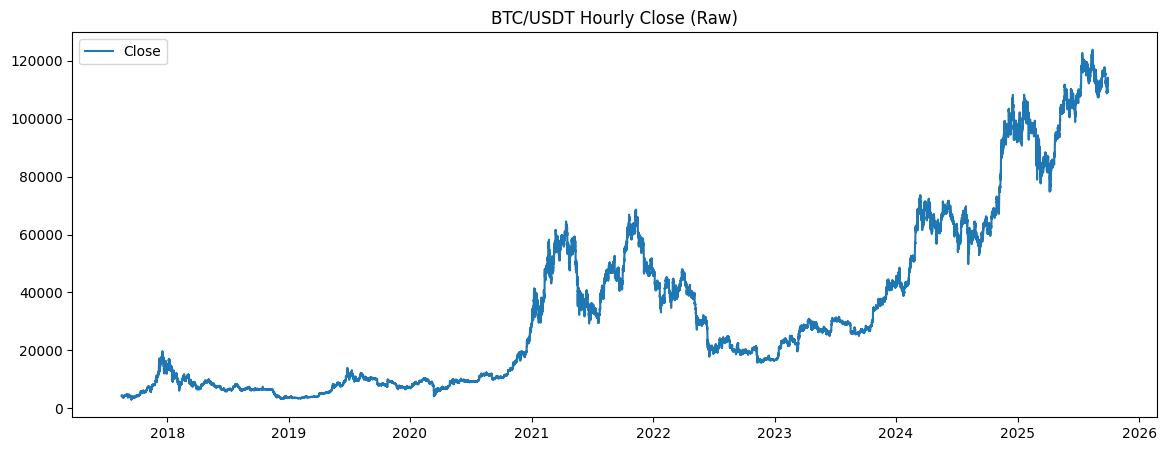

In [5]:
plt.figure(figsize=(14,5))
plt.plot(df_btc.index, df_btc['close'], label='Close')
plt.title("BTC/USDT Hourly Close (Raw)")
plt.legend()
plt.show()

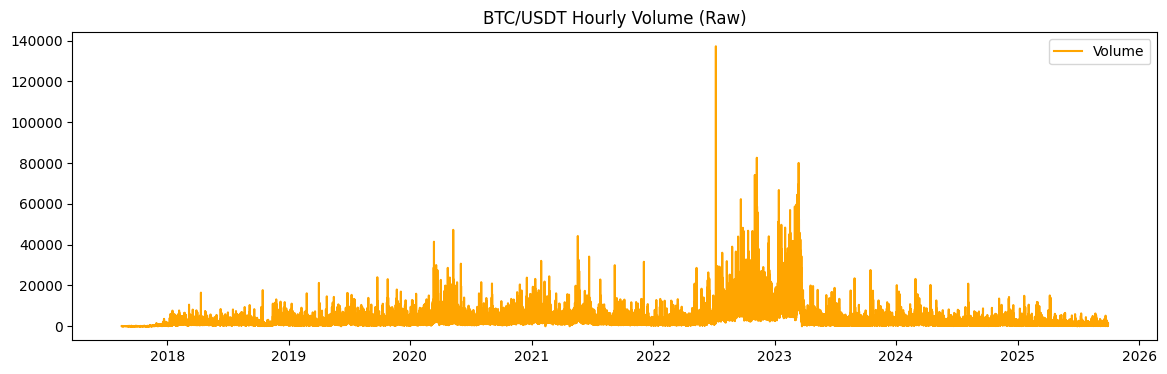

In [6]:
plt.figure(figsize=(14,4))
plt.plot(df_btc.index, df_btc['volume'], label='Volume', color='orange')
plt.title("BTC/USDT Hourly Volume (Raw)")
plt.legend()
plt.show()

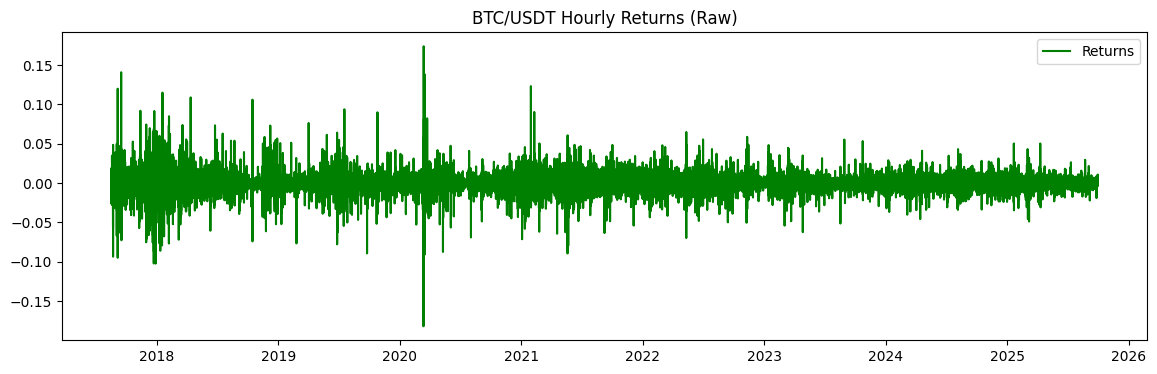

In [7]:
df_btc['returns'] = df_btc['close'].pct_change()
plt.figure(figsize=(14,4))
plt.plot(df_btc.index, df_btc['returns'], label='Returns', color='green')
plt.title("BTC/USDT Hourly Returns (Raw)")
plt.legend()
plt.show()

In [8]:
df_btc_proc, _ = coin_pre.preprocess(
    df=df_btc,
    symbol="BTC/USDT",
    input_interval="1h",
    target_freq="D",  
    fit_scaler=False,  
    save_scaler=False,  
    fill_method="ffill",
    drop_initial_na=True,
    return_numpy=False 
)

df_btc_proc.head()

,open,high,low,close,volume,returns,close_lag1,volatility,log_return,vol_7,...,sma_7,sma_21,ema_8,ema_20,volume_pct_change,volume_zscore_30,hour,dayofweek,month,is_month_start
2017-08-17 00:00:00+00:00,4261.48,4485.39,4200.74,4285.08,795.150377,0.000000,4285.08,0.000000,0.000000,0.000000,...,4285.080,4285.080,4285.080000,4285.080000,0.000000,0.000000,0,3,8,0
2017-08-18 00:00:00+00:00,4285.08,4371.52,3938.77,4108.37,1199.888264,-0.041238,4285.08,0.029160,-0.042113,0.029778,...,4196.725,4196.725,4245.811111,4268.250476,0.509008,0.707107,0,4,8,0
2017-08-19 00:00:00+00:00,4108.37,4184.69,3850.00,4139.98,381.309763,0.007694,4108.37,0.026313,0.007665,0.026802,...,4177.810,4177.810,4222.293086,4256.034240,-0.682212,-1.003686,0,5,8,0
2017-08-20 00:00:00+00:00,4120.98,4211.08,4032.62,4086.29,467.083022,-0.012969,4139.98,0.021503,-0.013053,0.021898,...,4154.930,4154.930,4192.070178,4239.868122,0.224944,-0.655995,0,6,8,0
2017-08-21 00:00:00+00:00,4069.13,4119.62,3911.79,4016.00,691.743060,-0.017201,4086.29,0.018788,-0.017351,0.019121,...,4127.144,4127.144,4152.943472,4218.547349,0.480985,-0.047499,0,0,8,0


<Axes: title={'center': 'BTC/USDT Daily Close'}>

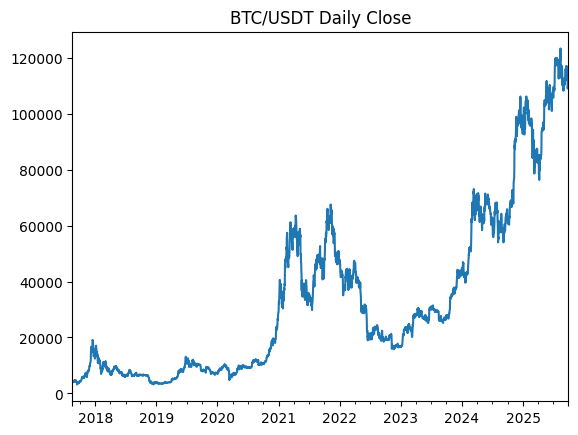

In [9]:
df_btc_proc['close'].plot(title="BTC/USDT Daily Close")

array([<Axes: >, <Axes: >], dtype=object)

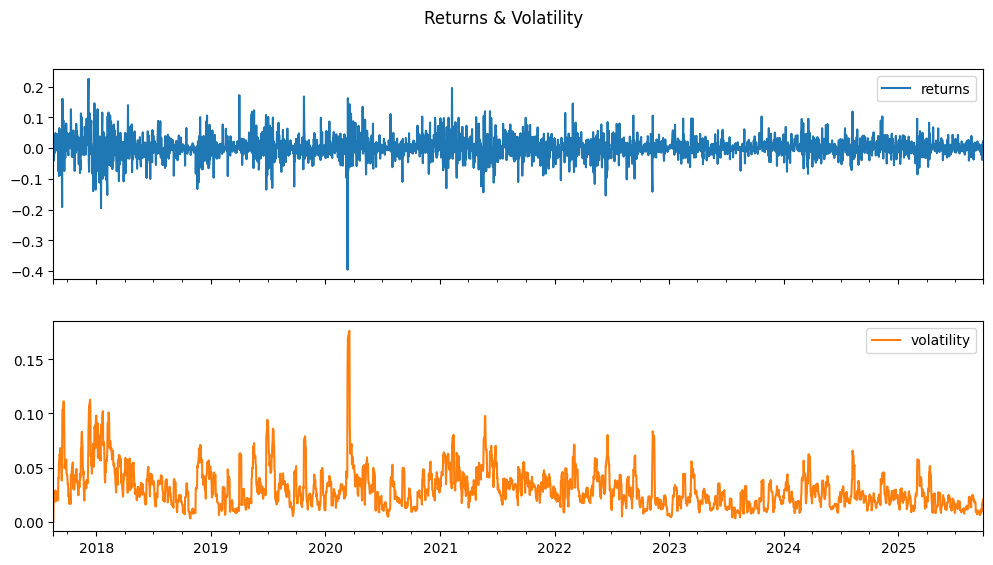

In [10]:
df_btc_proc[['returns', 'volatility']].plot(subplots=True, figsize=(12,6), title="Returns & Volatility")

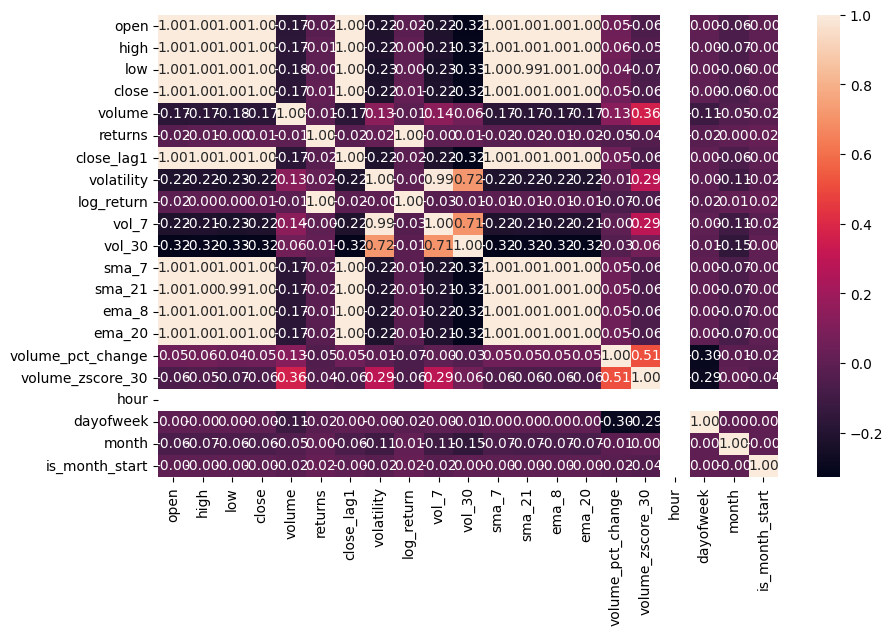

In [11]:
plt.figure(figsize=(10, 6))  
sns.heatmap(df_btc_proc.corr(), annot=True, fmt=".2f")
plt.show()

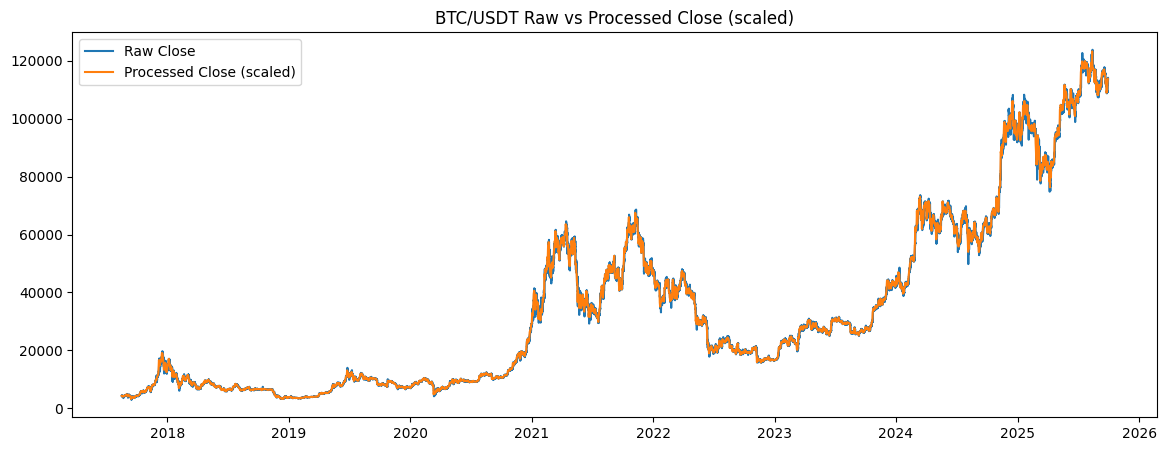

In [12]:
plt.figure(figsize=(14,5))
plt.plot(df_btc.index, df_btc['close'], label='Raw Close')
plt.plot(df_btc_proc.index, df_btc_proc['close'], label='Processed Close (scaled)')
plt.title("BTC/USDT Raw vs Processed Close (scaled)")
plt.legend()
plt.show()

In [13]:
print(df_btc_proc[['close', 'open', 'high', 'low']].head())

                             close     open     high      low
2017-08-17 00:00:00+00:00  4285.08  4261.48  4485.39  4200.74
2017-08-18 00:00:00+00:00  4108.37  4285.08  4371.52  3938.77
2017-08-19 00:00:00+00:00  4139.98  4108.37  4184.69  3850.00
2017-08-20 00:00:00+00:00  4086.29  4120.98  4211.08  4032.62
2017-08-21 00:00:00+00:00  4016.00  4069.13  4119.62  3911.79


In [14]:
import pandas as pd
from utils.cache import RedisCache

cache = RedisCache(host="localhost", port=6379, db=0, expire_seconds=60)

In [15]:

key_json = "test:json"
cache.set_json(key_json, {"hello": "world", "number": 123})
print(cache.get_json(key_json))

{'hello': 'world', 'number': 123}


In [16]:
key_df = "test:df"
df = pd.DataFrame({"time": pd.date_range("2023-01-01", periods=5, freq="D"),
                   "close": [100, 101, 103, 105, 110]})
cache.set_dataframe(key_df, df)

df_cached = cache.get_dataframe(key_df)
print(df_cached.head())

                      time  close
0  2023-01-01T00:00:00.000    100
1  2023-01-02T00:00:00.000    101
2  2023-01-03T00:00:00.000    103
3  2023-01-04T00:00:00.000    105
4  2023-01-05T00:00:00.000    110


D:\python_projects\crypto-analytics-platform\src\utils\cache.py:44: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  return pd.read_json(data, orient="split")
